## Exploring Lending Club Dataset on Kaggle

Below is some data exploration I did on the Lending Club Loan data set posted on Kaggle. The most interesting finding was discovering that Lending Club's proported 5% loan default rate is actually much higher, closer to 20% when you include loans that they "charged off" (See "Loan Status" section here). For the full dataset see Kaggle



In [16]:
import pandas
# Load the CSV file into the environment

loans = pandas.read_csv("~/loan.csv")

/Users/kaitfolweiler/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [17]:
# Dataframe dimensions
loans.shape

(887379, 74)

In [13]:
# column headers
loans.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
    

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# Summary statistics for numerical data
loans.describe(percentiles=None, include=None, exclude=None)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,458567.000000,458567.000000,458567.000000,458567.000000,458567.000000,458567.000000,458567.000000,458567.000000,458567.000000,458567.000000,...,21372.000000,18617.000000,21372.000000,21372.000000,21372.000000,21372.000000,458539.000000,21372.000000,21372.000000,21372.000000
mean,50445920.634529,53956692.623207,15217.758528,15217.758528,15211.457632,12.737586,443.197792,76847.372281,19.056607,0.346534,...,36552.811389,71.535317,1.389060,2.975482,5887.979740,60.831939,33319.484668,0.943945,1.537058,1.977307
std,14799301.128716,15598699.057033,8547.149345,8547.149345,8543.749758,4.336520,245.335512,73000.165233,22.631064,0.923782,...,43103.833619,23.022862,1.520129,2.631886,5284.701239,20.013254,36968.379629,1.446872,2.723339,2.874067
min,56705.000000,70825.000000,1000.000000,1000.000000,900.000000,5.320000,30.120000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.000000
25%,43246024.000000,46251845.500000,8600.000000,8600.000000,8575.000000,9.170000,265.440000,46300.000000,12.520000,0.000000,...,10251.500000,58.600000,0.000000,1.000000,2411.000000,47.700000,14300.000000,0.000000,0.000000,0.000000
50%,54187321.000000,57718943.000000,14000.000000,14000.000000,14000.000000,12.490000,385.860000,65000.000000,18.470000,0.000000,...,24684.500000,74.900000,1.000000,2.000000,4483.000000,61.900000,24400.000000,0.000000,0.000000,2.000000
75%,61423649.000000,65542326.000000,20000.000000,20000.000000,20000.000000,15.610000,580.730000,91000.000000,25.140000,0.000000,...,47858.000000,87.600000,2.000000,4.000000,7771.500000,75.200000,41300.000000,1.000000,2.000000,3.000000
max,68617057.000000,73544841.000000,35000.000000,35000.000000,35000.000000,28.990000,1445.460000,9500000.000000,9999.000000,39.000000,...,878459.000000,223.300000,22.000000,43.000000,127305.000000,151.400000,9999999.000000,17.000000,35.000000,32.000000


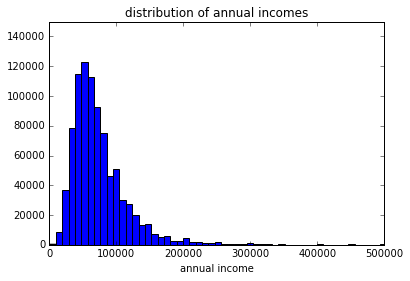

In [18]:
income = loans['annual_inc'].dropna()
plt.hist(income, 1000)
plt.axis([0, 500000, 0, 150000])
plt.xlabel('annual income')
plt.title('distribution of annual incomes')


## Annual Income
Mean income is about $ 75,000 
(much higher than I was expecting)

Looks like the majority of borrowers make between $45,000-90,000 a year 

Question then: does your income affect how much money you ask to be loaned?

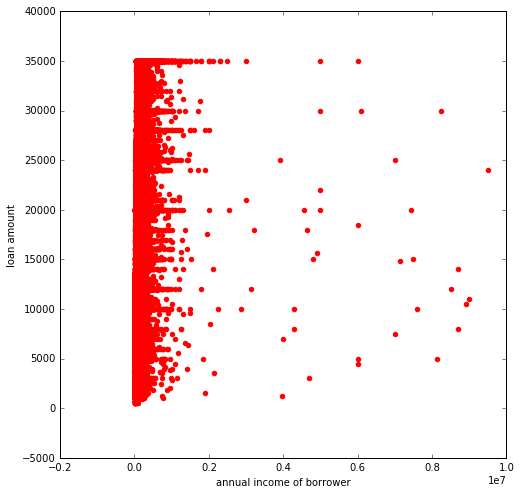

In [33]:
plt.figure(figsize=(8,8))
plt.scatter(loans['annual_inc'], loans['loan_amnt'], color='red')
plt.ylabel('loan amount')
plt.xlabel('annual income of borrower')

# Looks like no direct correlation. I also may need to zoom in on the lower end of the income spectrum to see patterns 

## What States Do Borrowers live?

In [ ]:
# Count the number of loans by state name and add to a dictionary of state names
states = loans['addr_state'].tolist()

state_counts = {}
for state in states:
    if state in state_counts:
        state_counts[state] += 1
    else:
        state_counts[state] = 1
        

In [21]:
# This shows the number of loans issued by state in descending order

from collections import OrderedDict
states_descending = OrderedDict(sorted(state_counts.items(), key=lambda kv: kv[1], reverse=True))
print(states_descending)

OrderedDict([('CA', 129517), ('NY', 74086), ('TX', 71138), ('FL', 60935), ('IL', 35476), ('NJ', 33256), ('PA', 31393), ('OH', 29631), ('GA', 29085), ('VA', 26255), ('NC', 24720), ('MI', 22985), ('MD', 21031), ('MA', 20593), ('AZ', 20412), ('WA', 19434), ('CO', 18807), ('MN', 15957), ('MO', 14207), ('IN', 13789), ('CT', 13531), ('TN', 12887), ('NV', 12443), ('WI', 11574), ('AL', 11200), ('OR', 10893), ('SC', 10639), ('LA', 10587), ('KY', 8550), ('OK', 8085), ('KS', 7926), ('AR', 6640), ('UT', 6264), ('NM', 4939), ('HI', 4570), ('WV', 4386), ('NH', 4294), ('RI', 3893), ('MS', 3819), ('MT', 2558), ('DE', 2511), ('DC', 2432), ('AK', 2205), ('WY', 2028), ('SD', 1815), ('VT', 1797), ('NE', 1176), ('ME', 525), ('ND', 479), ('IA', 14), ('ID', 12)])


## How much Principal and Interest do Borrowers pay?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13655f6d8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x12920deb8>]], dtype=object)

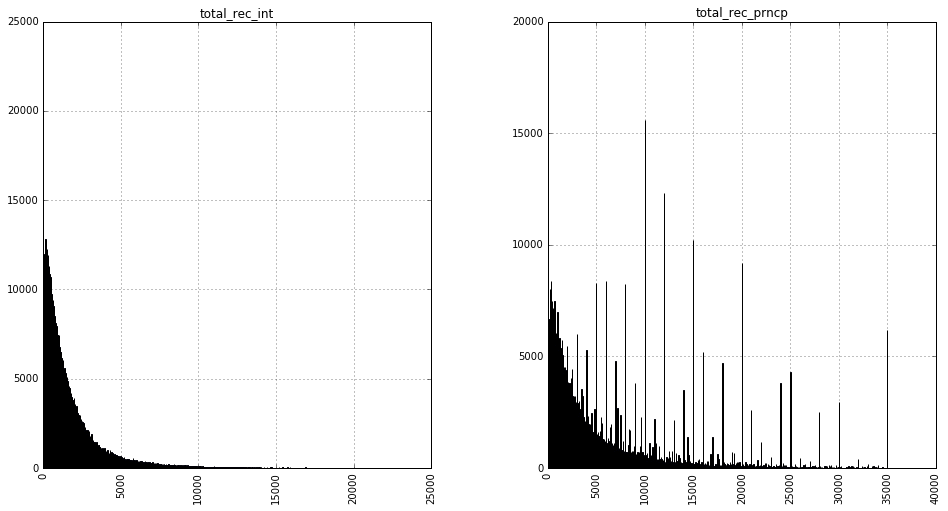

In [44]:
columns = ['total_rec_int', 'total_rec_prncp']

loans.hist(column=columns, bins = 1000, xrot= 90, figsize = (16,8))

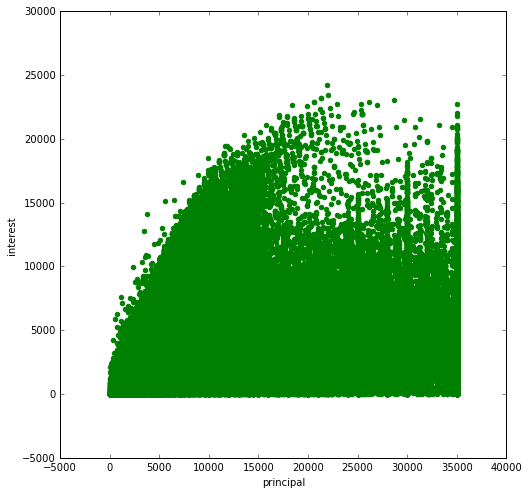

In [46]:
plt.figure(figsize=(8,8))
plt.scatter(loans['total_rec_prncp'], loans['total_rec_int'], color='green')
plt.ylabel('interest')
plt.xlabel('principal')
plt.show()

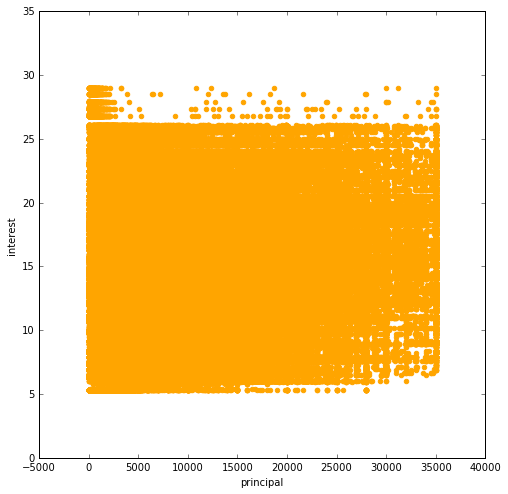

In [47]:
plt.figure(figsize=(8,8))
plt.scatter(loans['total_rec_prncp'], loans['int_rate'], color='orange')
plt.ylabel('interest')
plt.xlabel('principal')
plt.show()

## Loan Status

How many of the loans that were issued went into default? (looks like "Charged Off" is another way of saying default, correct me if I'm wrong though)

In [23]:
# Now I want to look at loan_status 

loans['loan_status'].value_counts()

Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

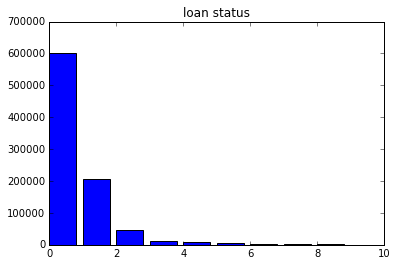

In [36]:
status = loans['loan_status'].value_counts()
index = []
stat = []
for i, statuses in enumerate(status):
    index.append(i)
    stat.append(statuses)

plt.bar(index, stat)
plt.title('loan status')
plt.show()    

# 0 = Current, 1 = Fully Paid, 2 = Charged Off, 3 = Late, 4 = Issued, 5 = In Grace Period, 6 = Late (16-30 days), 
# 7 = Does not meet the credit policy. Status:Fully Paid, 8 = Default, 9 = Does not meet the credit policy. Status:Charged Off

Looks like from the graph above, about 25% of loans on LC don't get repaid...Is that high? Seems risky if I'm an  investor

## Home Ownership

Do borrowers tend to have their own homes?

In [34]:
loans['home_ownership'].value_counts()

MORTGAGE    443557
RENT        356117
OWN          87470
OTHER          182
NONE            50
ANY              3
Name: home_ownership, dtype: int64

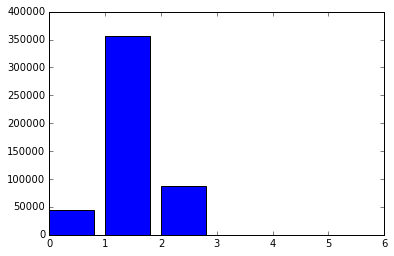

In [35]:
x = [0,1,2,3,4,5]
ownership_status = [44357, 356117, 87470, 182, 50, 3]
plt.bar(x, ownership_status)
plt.show()

# 0 = Mortgage, 1 = Rent, 2 = Own, 3 = Other, 4 = None, 5 = Any

In [38]:
borrowers_in_default = loans[loans['loan_status'] == 'Default' ]
#borrowers_in_default.head(15)
#print(len( borrowers_in_default[borrowers_in_default['grade'] == 'A']))
 
# Combined Defaults and Charged Off categories bc they seem to be the same thing    
defaults_and_charged_off = borrowers_in_default.append(loans[loans['loan_status'] == 'Charged Off' ])


# Looked at the grade of the loans that defaulted
default_grades = defaults_and_charged_off['grade'].value_counts()




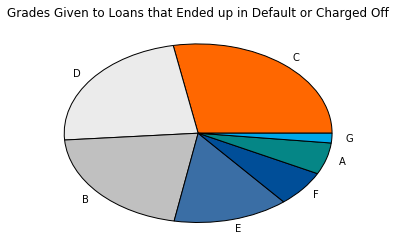

In [39]:

plt.pie(default_grades, explode=None, labels=default_grades.index,
    colors=('#FF6700', '#EBEBEB', '#C0C0C0', '#3A6EA5', '#004E98', '#058686', '#00A8E8'),
    autopct=None, pctdistance=0.6, shadow=False,
    labeldistance=1.1, startangle=None, radius=None,
    counterclock=True, wedgeprops=None, textprops=None,
    center = (0, 0), frame = False )
plt.title('Grades Given to Loans that Ended up in Default or Charged Off')
plt.show()


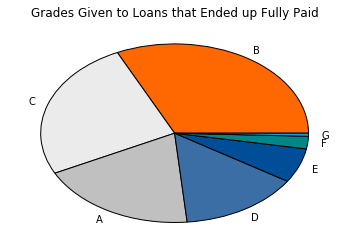

In [41]:
# Wanted to compare the default grades to the grades of fully paid loans

borrowers_who_fully_paid = loans[loans['loan_status'] == 'Fully Paid' ]

paid_in_full = borrowers_who_fully_paid['grade'].value_counts()

plt.pie(paid_in_full, explode=None, labels=paid_in_full.index,
    colors=('#FF6700', '#EBEBEB', '#C0C0C0', '#3A6EA5', '#004E98', '#058686', '#00A8E8'),
    autopct=None, pctdistance=0.6, shadow=False,
    labeldistance=1.1, startangle=None, radius=None,
    counterclock=True, wedgeprops=None, textprops=None,
    center = (0, 0), frame = False )
plt.title('Grades Given to Loans that Ended up Fully Paid')
plt.show()

In [42]:
print(borrowers_who_fully_paid['home_ownership'].value_counts())
print(defaults_and_charged_off['home_ownership'].value_counts())

MORTGAGE    104966
RENT         84646
OWN          17960
OTHER          114
NONE            36
ANY              1
Name: home_ownership, dtype: int64
RENT        21922
MORTGAGE    20376
OWN          4135
OTHER          27
NONE            7
Name: home_ownership, dtype: int64


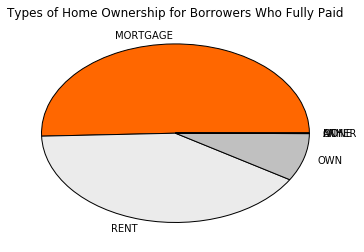

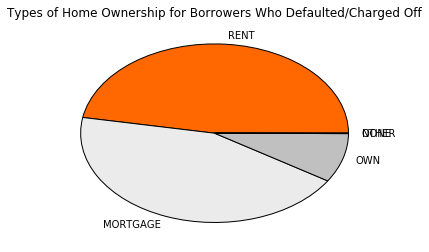

MORTGAGE    0.505317
RENT        0.407495
OWN         0.086461
OTHER       0.000549
NONE        0.000173
ANY         0.000005
Name: home_ownership, dtype: float64
RENT        0.471776
MORTGAGE    0.438505
OWN         0.088988
OTHER       0.000581
NONE        0.000151
Name: home_ownership, dtype: float64


In [43]:
home_own_percent = borrowers_who_fully_paid['home_ownership'].value_counts() / len(borrowers_who_fully_paid['home_ownership'])

plt.pie(home_own_percent, explode=None, labels=home_own_percent.index,
    colors=('#FF6700', '#EBEBEB', '#C0C0C0', '#3A6EA5', '#004E98'),
    autopct=None, pctdistance=0.6, shadow=False,
    labeldistance=1.1, startangle=None, radius=None,
    counterclock=True, wedgeprops=None, textprops=None,
    center = (0, 0), frame = False )
plt.title('Types of Home Ownership for Borrowers Who Fully Paid')
plt.show()

home_own_percent_def = defaults_and_charged_off['home_ownership'].value_counts() / len(defaults_and_charged_off['home_ownership'])
plt.pie(home_own_percent_def, explode=None, labels=home_own_percent_def.index,
    colors=('#FF6700', '#EBEBEB', '#C0C0C0', '#3A6EA5', '#004E98'),
    autopct=None, pctdistance=0.6, shadow=False,
    labeldistance=1.1, startangle=None, radius=None,
    counterclock=True, wedgeprops=None, textprops=None,
    center = (0, 0), frame = False )
plt.title('Types of Home Ownership for Borrowers Who Defaulted/Charged Off')
plt.show()

print(home_own_percent)
print(home_own_percent_def)

In [19]:
loans['issue_d'].unique()

array(['Dec-2011', 'Nov-2011', 'Oct-2011', 'Sep-2011', 'Aug-2011',
       'Jul-2011', 'Jun-2011', 'May-2011', 'Apr-2011', 'Mar-2011',
       'Feb-2011', 'Jan-2011', 'Dec-2010', 'Nov-2010', 'Oct-2010',
       'Sep-2010', 'Aug-2010', 'Jul-2010', 'Jun-2010', 'May-2010',
       'Apr-2010', 'Mar-2010', 'Feb-2010', 'Jan-2010', 'Dec-2009',
       'Nov-2009', 'Oct-2009', 'Sep-2009', 'Aug-2009', 'Jul-2009',
       'Jun-2009', 'May-2009', 'Apr-2009', 'Mar-2009', 'Feb-2009',
       'Jan-2009', 'Dec-2008', 'Nov-2008', 'Oct-2008', 'Sep-2008',
       'Aug-2008', 'Jul-2008', 'Jun-2008', 'May-2008', 'Apr-2008',
       'Mar-2008', 'Feb-2008', 'Jan-2008', 'Dec-2007', 'Nov-2007',
       'Oct-2007', 'Sep-2007', 'Aug-2007', 'Jul-2007', 'Jun-2007',
       'Dec-2013', 'Nov-2013', 'Oct-2013', 'Sep-2013', 'Aug-2013',
       'Jul-2013', 'Jun-2013', 'May-2013', 'Apr-2013', 'Mar-2013',
       'Feb-2013', 'Jan-2013', 'Dec-2012', 'Nov-2012', 'Oct-2012',
       'Sep-2012', 'Aug-2012', 'Jul-2012', 'Jun-2012', 'May-20

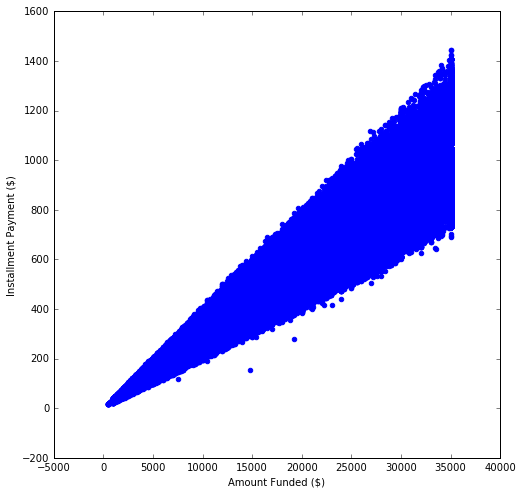

In [22]:
plt.figure(figsize=(8,8))
plt.scatter(loans['funded_amnt'], loans['installment'], color='blue')
plt.xlabel('Amount Funded ($)')
plt.ylabel('Installment Payment ($)')
plt.show()